# Using OCR in cloud

This notebook shows how to send an image for optical character recognition (OCR) to Google Vision service.

We call the ability to programs (in this case Google Vision) to communicate directly with other programs an application programming interface (API).

**TASK 1**
First, we install modules to communicate with Google Vision and to display images. This notebook needs credentials (in the file `key.json`). You have to generate your own (more information here: https://pypi.org/project/google-cloud-vision/).

You have to create a project, then a service account.
In Service Accounts, click on Manage keys in the right menu of the selected service. By clicking on Add key, you obtain a JSON file with the key. 
Rename the key and store it as `../resources/key.json`.

In [1]:
!pip install --user google-cloud-vision

     |████████████████████████████████| 461 kB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 92 kB 925 kB/s  eta 0:00:01
     |████████████████████████████████| 42 kB 1.8 MB/s  eta 0:00:01
     |████████████████████████████████| 198 kB 10.0 MB/s eta 0:00:01
     |████████████████████████████████| 146 kB 9.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 9.8 MB/s eta 0:00:01
     |████████████████████████████████| 4.2 MB 11.1 MB/s eta 0:00:01


In [2]:
!pip install --user pillow

## The image
The following image comes from David Rumsey Map Collection: https://www.davidrumsey.com/luna/servlet/detail/RUMSEY~8~1~247417~5515422:Text-Page--V--2--Preface--Guthrie,-#

In [3]:
!wget https://media.davidrumsey.com/rumsey/Size4/D5005/2647012.jpg

--2021-05-31 11:39:04--  https://media.davidrumsey.com/rumsey/Size4/D5005/2647012.jpg
Resolving media.davidrumsey.com (media.davidrumsey.com)... 35.227.202.64
Connecting to media.davidrumsey.com (media.davidrumsey.com)|35.227.202.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 629909 (615K) [image/jpeg]
Saving to: ‘2647012.jpg’

2647012.jpg         100%[===================>] 615.15K  3.03MB/s    in 0.2s    

2021-05-31 11:39:05 (3.03 MB/s) - ‘2647012.jpg’ saved [629909/629909]



In [4]:
path = "2647012.jpg"

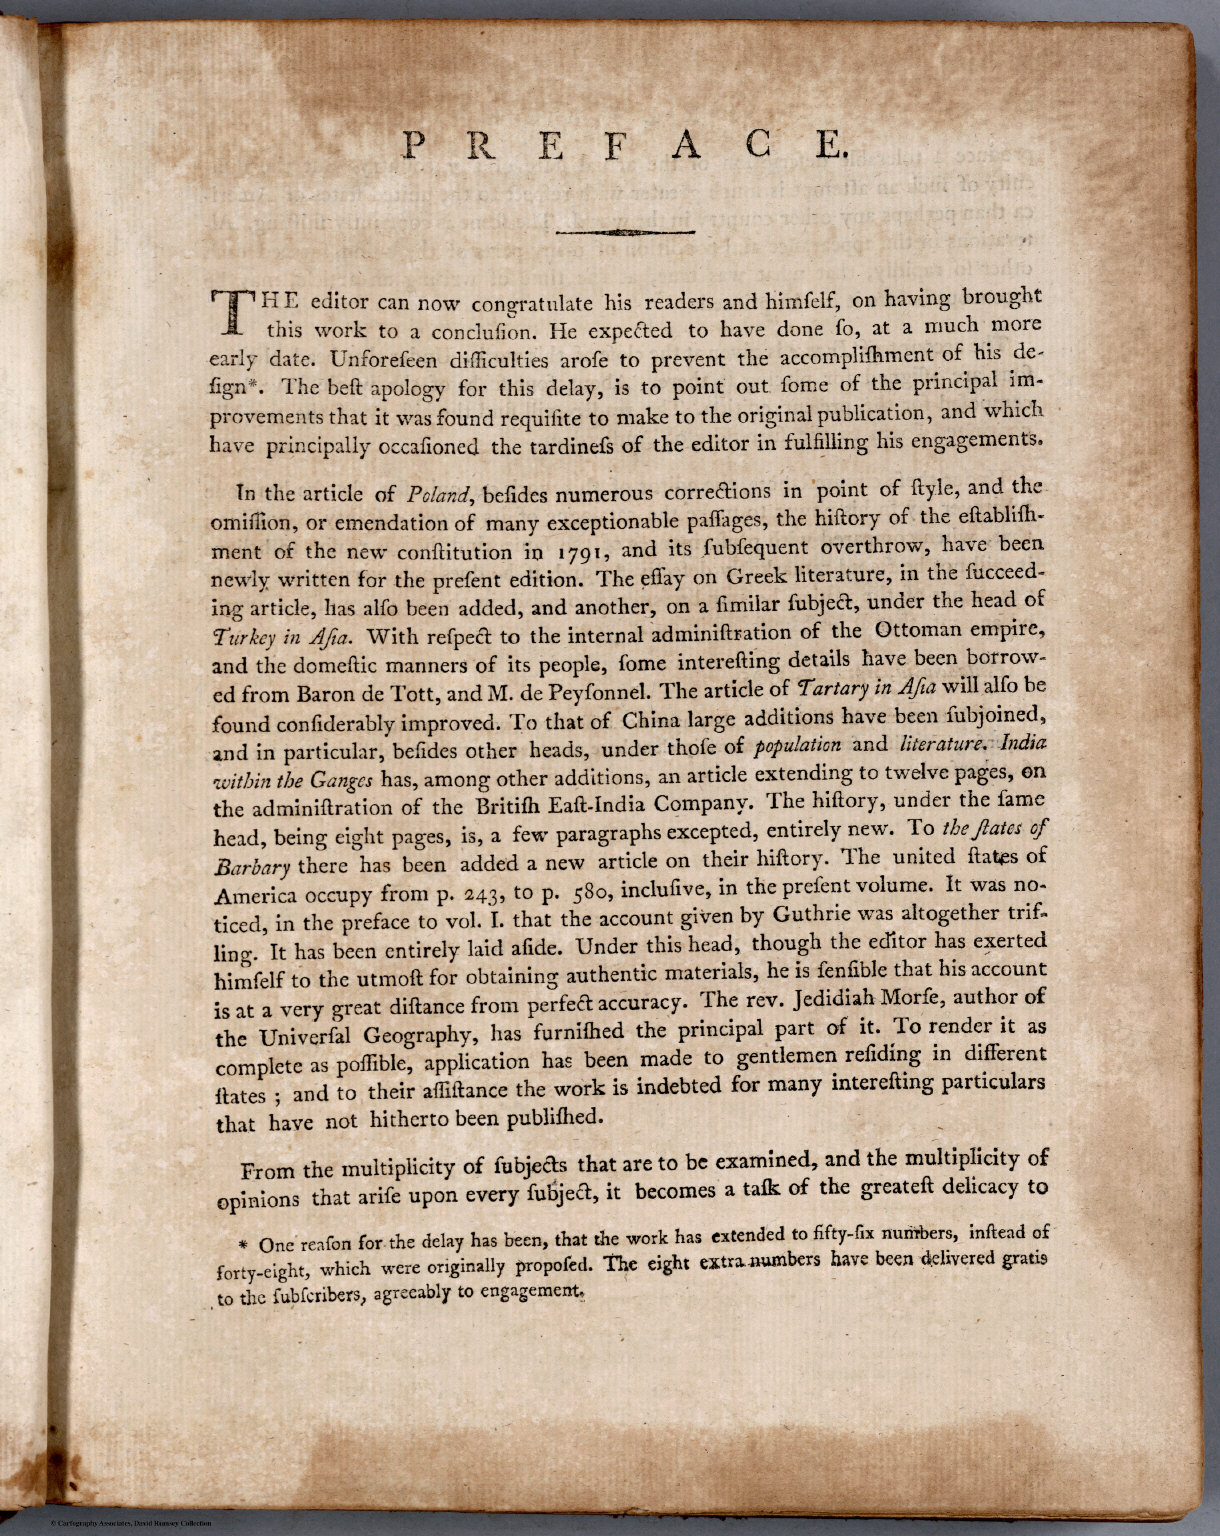

In [5]:
from IPython.display import Image 
Image(filename=path)

## Using the Google Vision API
N.B. you need the file `key.json`. It can be downloaded from your 

In [7]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="../resources/key.json"

In [8]:
from google.cloud import vision
import io

client = vision.ImageAnnotatorClient()

with io.open(path, 'rb') as image_file:
    content = image_file.read()

image = vision.Image()
image.content=content
#image = vision.types.Image(content=content)

response = client.text_detection(image=image)

### Resulting text
**TASK 2** Observe the result. Are there OCR errors? What is their origin?

In [9]:
texts = response.text_annotations

In [10]:
print(texts[0].description)

PREF АСЕ.
HE editor can now congratulate his readers and himfelf, on having brought
this work to a conclufion, He expected to have done fo, at a much more
early date. Unforefeen difficulties arofe to prevent the accomplifhment of his de-
fign". The beft apology for this delay, is to point out fome of the principal im-
provements that it was found requifite to make to the original publication, and which
have principally occafioned the tardinefs of the editor in fulfilling his engagements.
T
In the article of Poland, befides numerous corrections in point of ftyle, and the.
omiflion, or emendation of many exceptionable paffages, the hiftory of the eftablifh-
ment of the new conftitution in 1791, and its fubfequent overthrow, have been
newly written for the prefent edition. The efay on Greek literature, in the fucceed-
ing article, has alfo been added, and another, on a fimilar fubject, under the head of
Turkey in Afia. With refpect to the internal adminiftration of the Ottoman empire,
and

In [11]:
for text in texts[1:]:
    print('\n"{}"'.format(text.description))


"PREF"

"АСЕ."

"HE"

"editor"

"can"

"now"

"congratulate"

"his"

"readers"

"and"

"himfelf,"

"on"

"having"

"brought"

"this"

"work"

"to"

"a"

"conclufion,"

"He"

"expected"

"to"

"have"

"done"

"fo,"

"at"

"a"

"much"

"more"

"early"

"date."

"Unforefeen"

"difficulties"

"arofe"

"to"

"prevent"

"the"

"accomplifhment"

"of"

"his"

"de-"

"fign"."

"The"

"beft"

"apology"

"for"

"this"

"delay,"

"is"

"to"

"point"

"out"

"fome"

"of"

"the"

"principal"

"im-"

"provements"

"that"

"it"

"was"

"found"

"requifite"

"to"

"make"

"to"

"the"

"original"

"publication,"

"and"

"which"

"have"

"principally"

"occafioned"

"the"

"tardinefs"

"of"

"the"

"editor"

"in"

"fulfilling"

"his"

"engagements."

"T"

"In"

"the"

"article"

"of"

"Poland,"

"befides"

"numerous"

"corrections"

"in"

"point"

"of"

"ftyle,"

"and"

"the."

"omiflion,"

"or"

"emendation"

"of"

"many"

"exceptionable"

"paffages,"

"the"

"hiftory"

"of"

"the"

"eftablifh-"

"ment

**TASK 3** Observe what information is available for the last piece of text (stored in the variable `text`). Check all annotations of the variable `text`:

In [14]:
help(text)

Help on EntityAnnotation object:

class EntityAnnotation(google.protobuf.pyext._message.CMessage, google.protobuf.message.Message)
 |  A ProtocolMessage
 |  
 |  Method resolution order:
 |      EntityAnnotation
 |      google.protobuf.pyext._message.CMessage
 |      google.protobuf.message.Message
 |      builtins.object
 |  
 |  Data descriptors defined here:
 |  
 |  bounding_poly
 |      Field google.cloud.vision.v1.EntityAnnotation.bounding_poly
 |  
 |  confidence
 |      Field google.cloud.vision.v1.EntityAnnotation.confidence
 |  
 |  description
 |      Field google.cloud.vision.v1.EntityAnnotation.description
 |  
 |  locale
 |      Field google.cloud.vision.v1.EntityAnnotation.locale
 |  
 |  locations
 |      Field google.cloud.vision.v1.EntityAnnotation.locations
 |  
 |  mid
 |      Field google.cloud.vision.v1.EntityAnnotation.mid
 |  
 |  properties
 |      Field google.cloud.vision.v1.EntityAnnotation.properties
 |  
 |  score
 |      Field google.cloud.vision.v1.Entit

In [16]:
text.bounding_poly

vertices {
  x: 181
  y: 1520
}
vertices {
  x: 210
  y: 1520
}
vertices {
  x: 210
  y: 1525
}
vertices {
  x: 181
  y: 1525
}

In [15]:
text.topicality

0.0

### Visualization
In this step, we go through all extracted characters or group of characters and draw a rectangle. 
**TASK 4** What do the rectangles mean? How does the OCR "understand" the text? What is the "unit" of OCR?

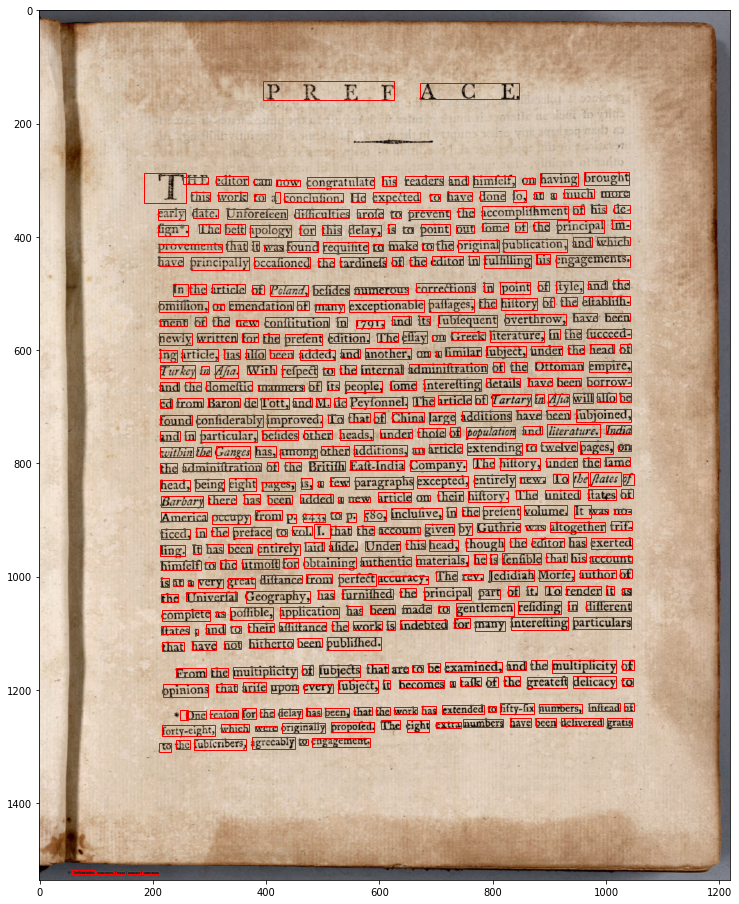

In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

im = np.array(Image.open(path), dtype=np.uint8)

# Create figure and axes

fig,ax = plt.subplots(1, figsize=(18,16))


# Display the image
ax.imshow(im)

for text in texts[1:]:
    from_vertex = text.bounding_poly.vertices[0]
    width = text.bounding_poly.vertices[-2].x - from_vertex.x
    height = text.bounding_poly.vertices[-2].y - from_vertex.y
    # Create a Rectangle patch
    rect = patches.Rectangle((from_vertex.x,from_vertex.y),width,height,linewidth=1,edgecolor='r',facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

plt.show()